In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import statsmodels.api as sm


In [2]:
data = pd.read_csv("C:/Users/C5295630/Documents/DataScience\Assignment/ToyotaCorolla.csv")
data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,4,5,210,1165
1,13750,23,72937,90,2000,3,4,5,210,1165
2,13950,24,41711,90,2000,3,4,5,210,1165
3,14950,26,48000,90,2000,3,4,5,210,1165
4,13750,30,38500,90,2000,3,4,5,210,1170


In [3]:
data1 = data
data1 = data.drop(['Cylinders'],axis= 1)

In [4]:
data1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [13]:
data2 = data1
data2['Price'] = data1['Price'].astype('float')
data2['KM'] = data1['KM'].astype('float')
data2['Quarterly_Tax'] = data1['Quarterly_Tax'].astype('float')
data2['Weight'] = data1['Weight'].astype('float')
data2= data1.drop_duplicates()
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          1435 non-null   float64
 1   Age_08_04      1435 non-null   int64  
 2   KM             1435 non-null   float64
 3   HP             1435 non-null   int64  
 4   cc             1435 non-null   int64  
 5   Doors          1435 non-null   int64  
 6   Gears          1435 non-null   int64  
 7   Quarterly_Tax  1435 non-null   float64
 8   Weight         1435 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 112.1 KB


In [14]:
data2.shape

(1435, 9)

In [15]:
data3 = data2
data3= data2.rename(columns={'Age_08_04' : 'Age'})
data3.head()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500.0,23,46986.0,90,2000,3,5,210.0,1165.0
1,13750.0,23,72937.0,90,2000,3,5,210.0,1165.0
2,13950.0,24,41711.0,90,2000,3,5,210.0,1165.0
3,14950.0,26,48000.0,90,2000,3,5,210.0,1165.0
4,13750.0,30,38500.0,90,2000,3,5,210.0,1170.0


In [16]:
data3.shape

(1435, 9)

C:\Users\C5295630\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\C5295630\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\C5295630\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

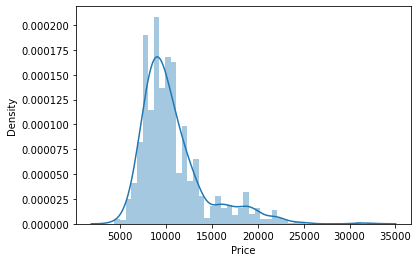

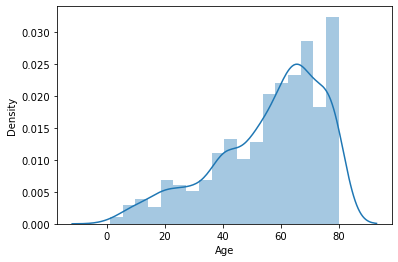

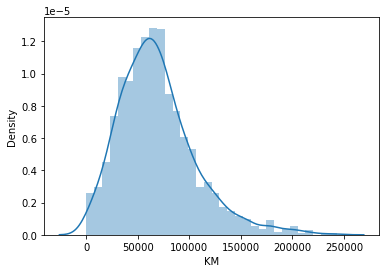

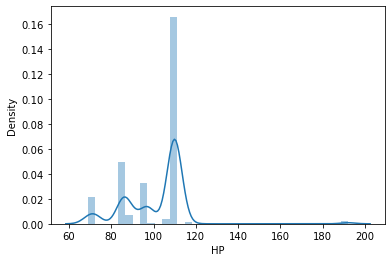

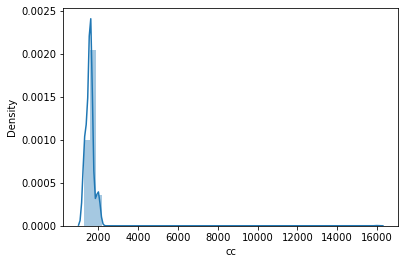

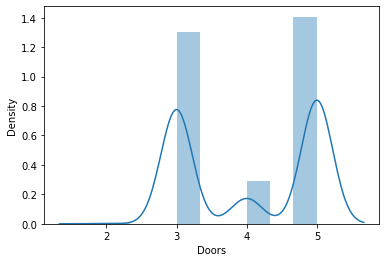

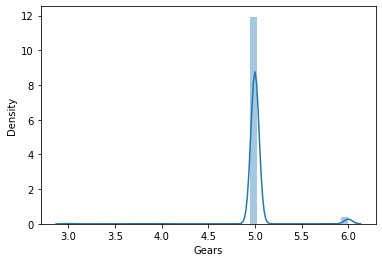

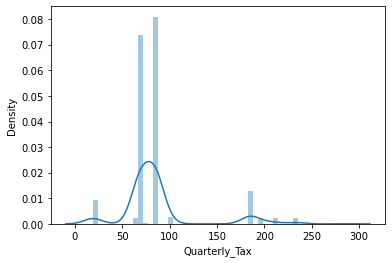

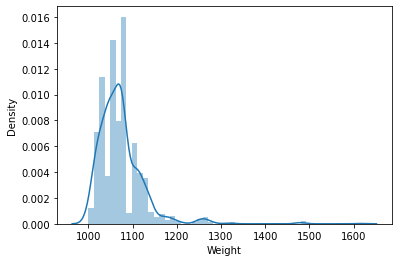

<Figure size 432x288 with 0 Axes>

In [17]:
sns.distplot(data3['Price'])
fig=plt.figure()
sns.distplot(data3['Age'])
fig=plt.figure()
sns.distplot(data3['KM'])
fig=plt.figure()
sns.distplot(data3['HP'])
fig=plt.figure()
sns.distplot(data3['cc'])
fig=plt.figure()
sns.distplot(data3['Doors'])
fig=plt.figure()
sns.distplot(data3['Gears'])
fig=plt.figure()
sns.distplot(data3['Quarterly_Tax'])
fig=plt.figure()
sns.distplot(data3['Weight'])
fig=plt.figure()

In [18]:
data3.corr()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


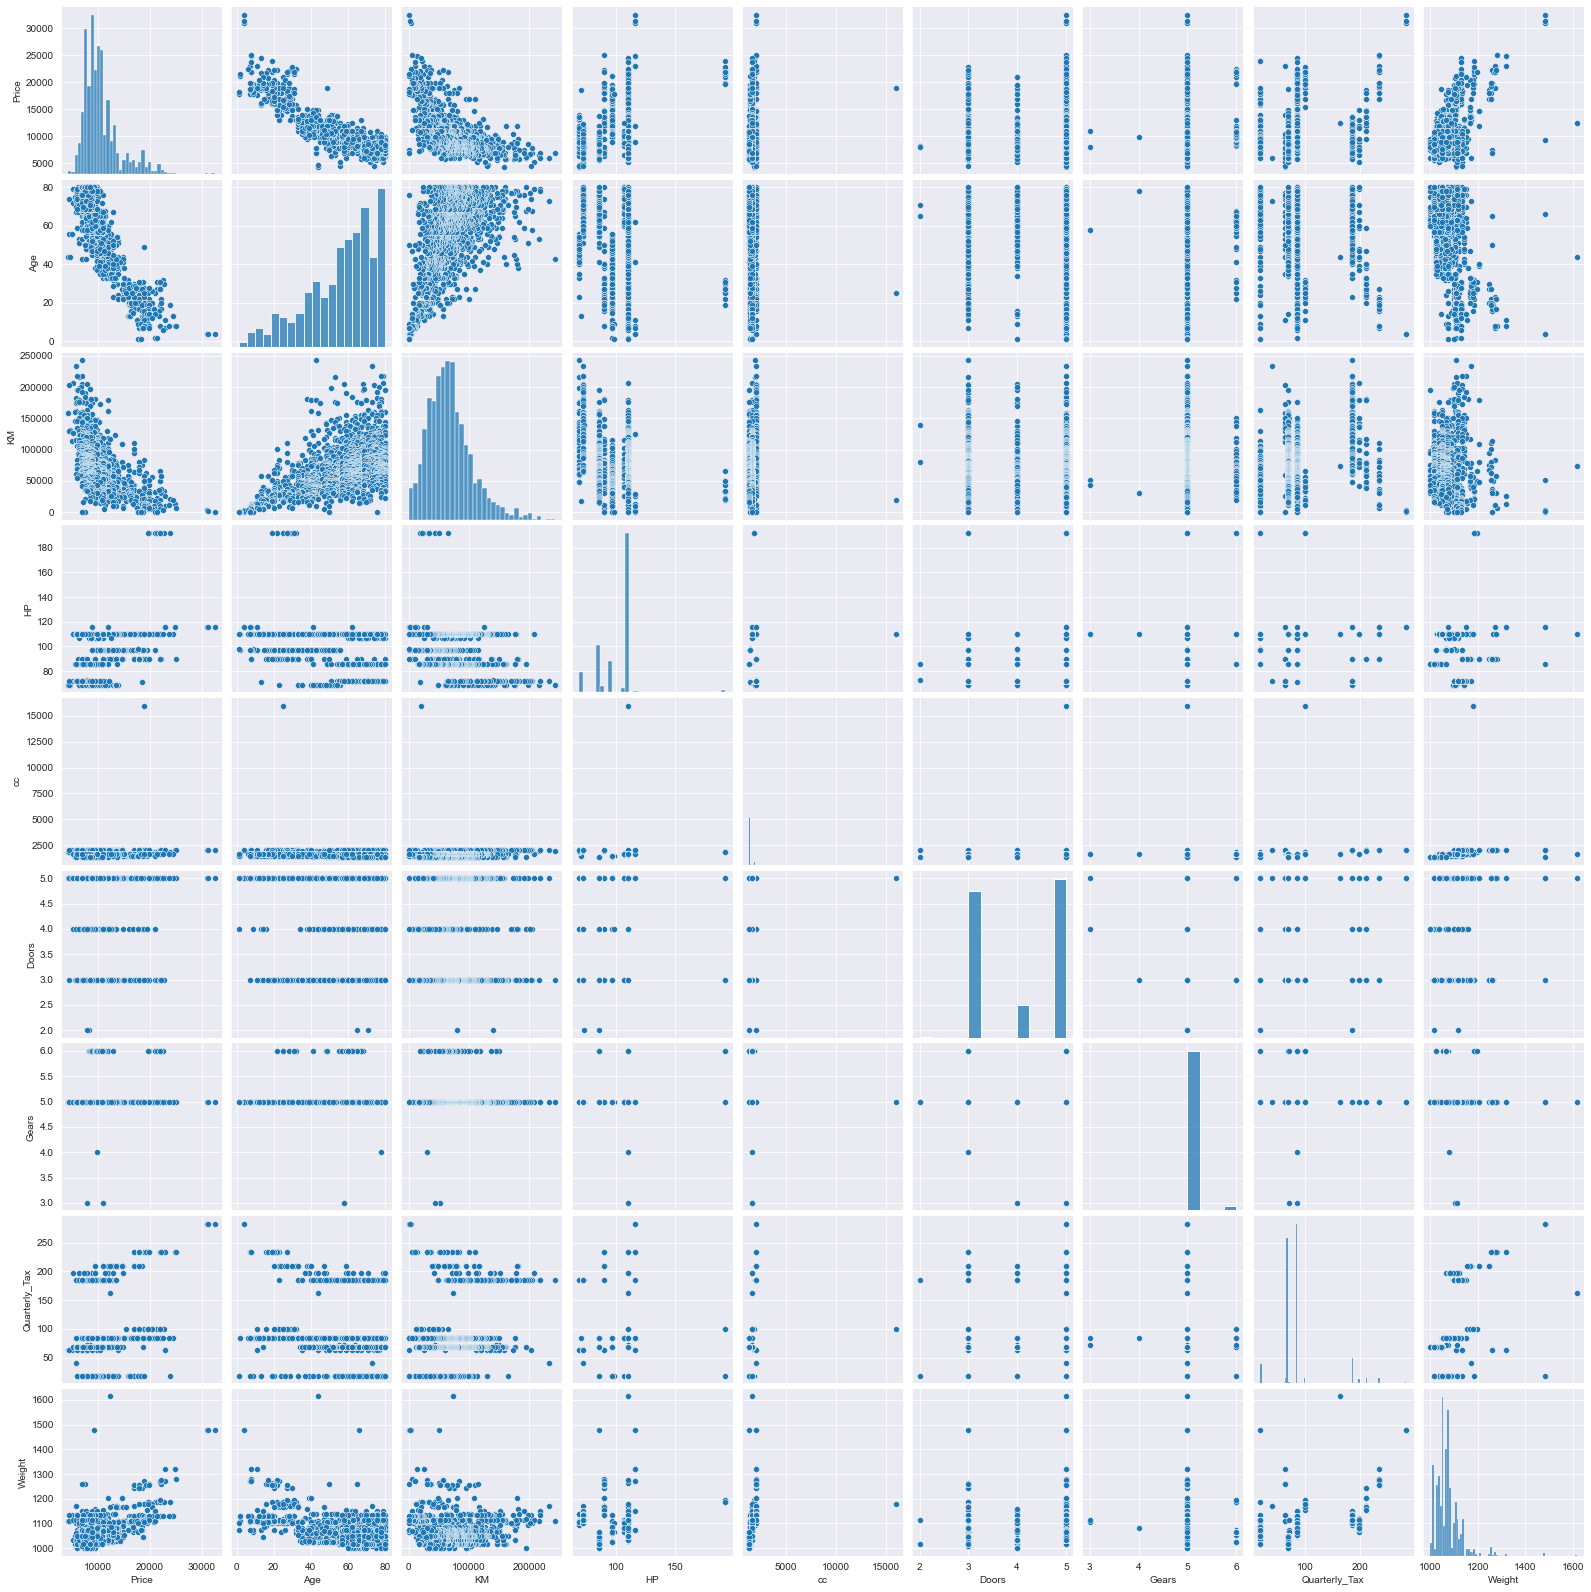

In [19]:
sns.set_style(style='darkgrid')
sns.pairplot(data3) ##no indepedent values are strongly correlated.

In [20]:
model1 = smf.ols("data3['Price']~data3['Age']+data3['KM']+data3['HP']+data3['cc']+data3['Doors']+data3['Gears']+data3['Quarterly_Tax']+data3['Weight']",data=data3).fit()

In [21]:
model1.summary() ##here we found variables cc,Doors are insignificant

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         data3['Price']   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Fri, 23 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:07:24   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
data3['Age']            -121.7139      2.615    -46.552      0.000    -126.843    -116.585
data3['KM']               -0.0207      0.001    -16.552      0.000      -0.023      -0.018
data3['HP']               31.5846      2.818     11.210      0.000      26.058      37.112
data3['cc']               -0.1186      0.090     -1.316      0.188      -0.295       0.058
data3['Doors']            -0.9202     39.988     -0.023      0.982     -79.362      77.522
data3['Gears']           597.7159    196.969      3.035      0.002     211.335     984.097
data3['Quarterly_Tax']     3.8588      1.311      2.944      0.003       1.288       6.430
data3['Weight']           16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

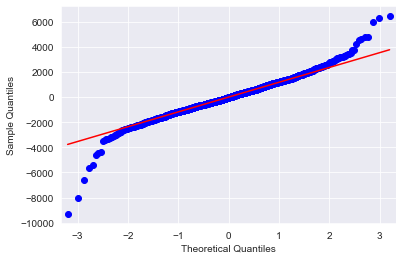

In [24]:
qqplot= sm.qqplot(model1.resid,line='q')

## from this model1, we need to perform simple linear regresion for cc & doors variables

In [26]:
sl_cc = smf.ols("data3['Price']~data3['cc']",data=data3).fit()
print(sl_cc.tvalues, '\n', sl_cc.pvalues)
sl_Doors = smf.ols("data3['Price']~data3['Doors']",data=data3).fit()
print(sl_Doors.tvalues, '\n', sl_cc.pvalues)

##here p-values are less than 0.05

Intercept      24.879592
data3['cc']     4.745039
dtype: float64 
 Intercept      7.236022e-114
data3['cc']     2.292856e-06
dtype: float64
Intercept         19.421546
data3['Doors']     7.070520
dtype: float64 
 Intercept      7.236022e-114
data3['cc']     2.292856e-06
dtype: float64


## we need to perform multiple linear regresion for cc & doors variables

In [27]:
ml = smf.ols("data3['Price']~data3['cc']+data3['Doors']",data=data3).fit()
print(ml.tvalues, '\n', ml.pvalues)

Intercept         12.786341
data3['cc']        4.268006
data3['Doors']     6.752236
dtype: float64 
 Intercept         1.580945e-35
data3['cc']       2.101878e-05
data3['Doors']    2.109558e-11
dtype: float64


## we need to evaluate VIF values

In [30]:
rs_hp = smf.ols("data3['HP']~data3['cc']+data3['Doors']+data3['Gears']+data3['Quarterly_Tax']+data3['Weight']",data=data3).fit().rsquared
vif_hp=1/(1-rs_hp)
rs_cc = smf.ols("data3['cc']~data3['HP']+data3['Doors']+data3['Gears']+data3['Quarterly_Tax']+data3['Weight']",data=data3).fit().rsquared
vif_cc=1/(1-rs_hp)
rs_dr = smf.ols("data3['Doors']~data3['cc']+data3['HP']+data3['Gears']+data3['Quarterly_Tax']+data3['Weight']",data=data3).fit().rsquared
vif_dr=1/(1-rs_dr)
rs_gr = smf.ols("data3['Gears']~data3['cc']+data3['Doors']+data3['HP']+data3['Quarterly_Tax']+data3['Weight']",data=data3).fit().rsquared
vif_gr=1/(1-rs_gr)
rs_tx = smf.ols("data3['Quarterly_Tax']~data3['cc']+data3['Doors']+data3['Gears']+data3['HP']+data3['Weight']",data=data3).fit().rsquared
vif_tx=1/(1-rs_tx)
rs_wt = smf.ols("data3['Weight']~data3['cc']+data3['Doors']+data3['Gears']+data3['Quarterly_Tax']+data3['HP']",data=data3).fit().rsquared
vif_wt=1/(1-rs_wt)

print(vif_hp,vif_cc,vif_dr,vif_gr,vif_tx,vif_wt)

## vif values are less for cc & Doors Variables, so we are not remving any variables

1.3534916315916965 1.3534916315916965 1.1546288454075377 1.091856776011378 2.1347862379325058 2.090277638007833


In [36]:
model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance

Text(0, 0.5, 'Cooks Distance')

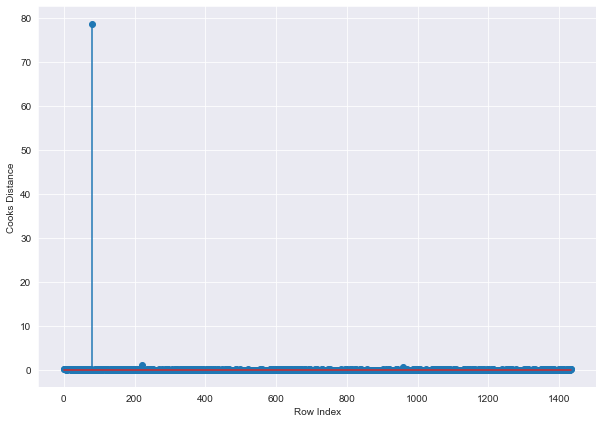

In [41]:
fig = plt.subplots(figsize=(10,7))
plt.stem(np.arange(len(data3)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')

In [43]:
(np.argmax(c),np.max(c))

(80, 78.7295058224851)

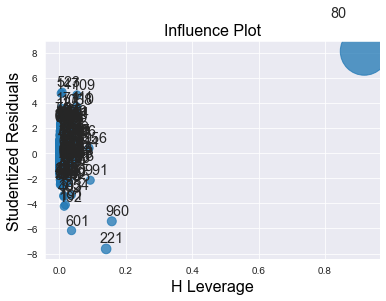

In [44]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

In [68]:
new_data= pd.read_csv("C:/Users/C5295630/Documents/DataScience\Assignment/ToyotaCorolla.csv")
data4 = new_data.drop(new_data.index[[80,221,960]],axis=0).reset_index()
data4.shape

(1433, 11)

In [69]:
model2= smf.ols("data4['Price']~data4['Age_08_04']+data4['KM']+data4['HP']+data4['cc']+data4['Doors']+data4['Gears']+data4['Quarterly_Tax']+data4['Weight']",data=data4).fit()

In [70]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         data4['Price']   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1372.
Date:                Fri, 23 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:05:32   Log-Likelihood:                -12226.
No. Observations:                1433   AIC:                         2.447e+04
Df Residuals:                    1424   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.474e+04   1432.942    -10.289      0.000   -1.76e+04   -1.19e+04
data4['Age_08_04']      -112.0180      2.479    -45.185      0.000    -116.881    -107.155
data4['KM']               -0.0170      0.001    -14.160      0.000      -0.019      -0.015
data4['HP']               36.6084      2.745     13.334      0.000      31.223      41.994
data4['cc']               -3.7954      0.302    -12.562      0.000      -4.388      -3.203
data4['Doors']          -122.5437     37.480     -3.270      0.001    -196.067     -49.021
data4['Gears']           464.9839    180.976      2.569      0.010     109.975     819.993
data4['Quarterly_Tax']     5.2134      1.371      3.802      0.000       2.523       7.904
data4['Weight']           30.6398      1.290     23.748      0.000      28.109      33.171
==============================================================================
Omnibus:                      121.821   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.567
Skew:                          -0.082   Prob(JB):                    1.01e-153
Kurtosis:                       6.431   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
residual2= model2.resid

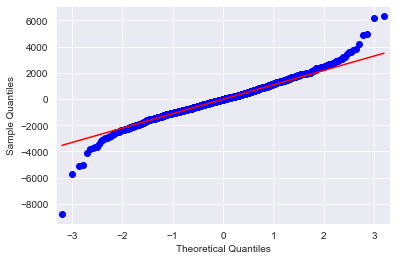

In [72]:
qqplot2=sm.qqplot(residual2,line='q')

In [75]:
rmse=np.sqrt((np.sum(residual2**2))/1434)
rmse

1227.045921830358